<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('transfusion_data.csv')

In [31]:
df.shape

(748, 5)

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency_months,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency_times,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary_cc_blood,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time_months,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether_he_or_she_donated_blood_in_March_2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   recency_months                                 748 non-null    int64
 1   frequency_times                                748 non-null    int64
 2   monetary_cc_blood                              748 non-null    int64
 3   time_months                                    748 non-null    int64
 4   whether_he_or_she_donated_blood_in_March_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [34]:
df.head()

,recency_months,frequency_times,monetary_cc_blood,time_months,whether_he_or_she_donated_blood_in_March_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [35]:
df.isnull().sum()

recency_months                                   0
frequency_times                                  0
monetary_cc_blood                                0
time_months                                      0
whether_he_or_she_donated_blood_in_March_2007    0
dtype: int64

In [36]:
df.columns

Index(['recency_months', 'frequency_times', 'monetary_cc_blood', 'time_months',
       'whether_he_or_she_donated_blood_in_March_2007'],
      dtype='object')

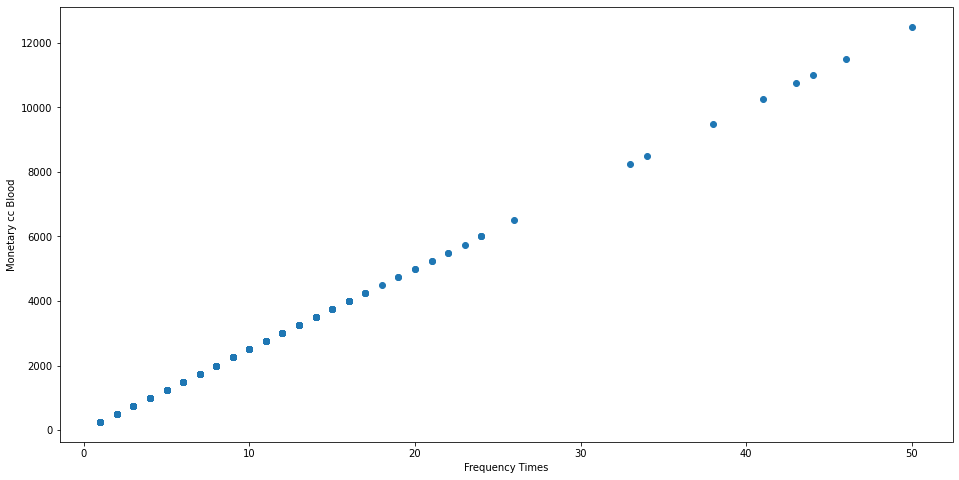

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['frequency_times'], df['monetary_cc_blood'])
ax.set_xlabel('Frequency Times')
ax.set_ylabel('Monetary cc Blood')
plt.show()

In [38]:
#Detecting outlier
z = np.abs(stats.zscore(df))
print(z)

[[0.92789873 7.62334626 7.62334626 2.61563344 1.78948238]
 [1.17511806 1.28273826 1.28273826 0.2578809  1.78948238]
 [1.0515084  1.79684161 1.79684161 0.02947053 1.78948238]
 ...
 [1.66790417 0.43093957 0.43093957 1.13782607 0.55882081]
 [3.64565877 0.77367514 0.77367514 0.19367135 0.55882081]
 [7.72477762 0.77367514 0.77367514 1.54832812 0.55882081]]


In [39]:
threshold = 3
print(np.where(z > 3))

(array([  0,   0,   4,   4,   9,   9, 115, 115, 341, 341, 495, 496, 497,
       498, 499, 500, 500, 502, 502, 503, 503, 504, 504, 505, 505, 517,
       517, 528, 528, 746, 747]), array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 0]))


In [40]:
print(z[0][1])

7.62334626135984


In [41]:
# Using IQR to detect outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

recency_months                                     11.25
frequency_times                                     5.00
monetary_cc_blood                                1250.00
time_months                                        34.00
whether_he_or_she_donated_blood_in_March_2007       0.00
dtype: float64


In [42]:
print(df < (Q1 - 1.5 * IQR)),(df > (Q3 + 1.5 * IQR))

     recency_months  ...  whether_he_or_she_donated_blood_in_March_2007
0             False  ...                                          False
1             False  ...                                          False
2             False  ...                                          False
3             False  ...                                          False
4             False  ...                                          False
..              ...  ...                                            ...
743           False  ...                                          False
744           False  ...                                          False
745           False  ...                                          False
746           False  ...                                          False
747           False  ...                                          False

[748 rows x 5 columns]


(None,      recency_months  ...  whether_he_or_she_donated_blood_in_March_2007
 0             False  ...                                           True
 1             False  ...                                           True
 2             False  ...                                           True
 3             False  ...                                           True
 4             False  ...                                          False
 ..              ...  ...                                            ...
 743           False  ...                                          False
 744           False  ...                                          False
 745           False  ...                                          False
 746            True  ...                                          False
 747            True  ...                                          False
 
 [748 rows x 5 columns])

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [43]:
df_o = df[(z < 3).all(axis=1)]
df_o.shape

(729, 5)

In [44]:
df_o.head()

,recency_months,frequency_times,monetary_cc_blood,time_months,whether_he_or_she_donated_blood_in_March_2007
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
5,4,4,1000,4,0
6,2,7,1750,14,1


In [45]:
from sklearn.preprocessing import normalize
X = df_o.drop(['whether_he_or_she_donated_blood_in_March_2007'],axis=1)
print(X)
X_prep = normalize(X)

     recency_months  frequency_times  monetary_cc_blood  time_months
1                 0               13               3250           28
2                 1               16               4000           35
3                 2               20               5000           45
5                 4                4               1000            4
6                 2                7               1750           14
..              ...              ...                ...          ...
741              23                7               1750           88
742              16                3                750           86
743              23                2                500           38
744              21                2                500           52
745              23                3                750           62

[729 rows x 4 columns]


In [46]:
print(X_prep)

[[0.00000000e+00 3.99981956e-03 9.99954891e-01 8.61499598e-03]
 [2.49988423e-04 3.99981476e-03 9.99953691e-01 8.74959479e-03]
 [3.99980569e-04 3.99980569e-03 9.99951424e-01 8.99956281e-03]
 ...
 [4.58191877e-02 3.98427719e-03 9.96069298e-01 7.57012666e-02]
 [4.17379569e-02 3.97504352e-03 9.93760879e-01 1.03351131e-01]
 [3.05479100e-02 3.98451000e-03 9.96127500e-01 8.23465400e-02]]


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   recency_months                                 748 non-null    int64
 1   frequency_times                                748 non-null    int64
 2   monetary_cc_blood                              748 non-null    int64
 3   time_months                                    748 non-null    int64
 4   whether_he_or_she_donated_blood_in_March_2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [48]:
X= df.drop('whether_he_or_she_donated_blood_in_March_2007', axis=1)
y = df['whether_he_or_she_donated_blood_in_March_2007']

In [49]:
X

,recency_months,frequency_times,monetary_cc_blood,time_months
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [50]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether_he_or_she_donated_blood_in_March_2007, Length: 748, dtype: int64

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
X_train.shape, y_train

((598, 4), 593    1
 131    0
 44     1
 70     0
 670    0
       ..
 71     0
 106    0
 270    0
 435    0
 102    0
 Name: whether_he_or_she_donated_blood_in_March_2007, Length: 598, dtype: int64)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [62]:
from sklearn.tree import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Step 9: Fit the Model

In [63]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [64]:
test_model = dt.predict(X_test)
test_model

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1])

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [67]:
from sklearn.metrics import accuracy_score
#score = accuracy_score(y_test, test_model)
score = dt.score(X_test, test_model)
score

1.0

[Text(927.1939655172414, 527.6117647058824, 'recency_months <= 6.5\ngini = 0.36\nsamples = 598\nvalue = [457, 141]'),
 Text(443.03275862068966, 495.63529411764705, 'frequency_times <= 4.5\ngini = 0.466\nsamples = 297\nvalue = [187, 110]'),
 Text(118.33448275862068, 463.6588235294118, 'time_months <= 2.5\ngini = 0.368\nsamples = 140\nvalue = [106, 34]'),
 Text(51.95172413793103, 431.6823529411765, 'frequency_times <= 1.5\ngini = 0.191\nsamples = 28\nvalue = [25, 3]'),
 Text(40.40689655172414, 399.7058823529412, 'gini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(63.49655172413793, 399.7058823529412, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(184.71724137931034, 431.6823529411765, 'time_months <= 12.0\ngini = 0.4\nsamples = 112\nvalue = [81, 31]'),
 Text(86.58620689655172, 399.7058823529412, 'time_months <= 3.5\ngini = 0.477\nsamples = 56\nvalue = [34, 22]'),
 Text(75.04137931034482, 367.7294117647059, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(98.13103448275862, 367.7294

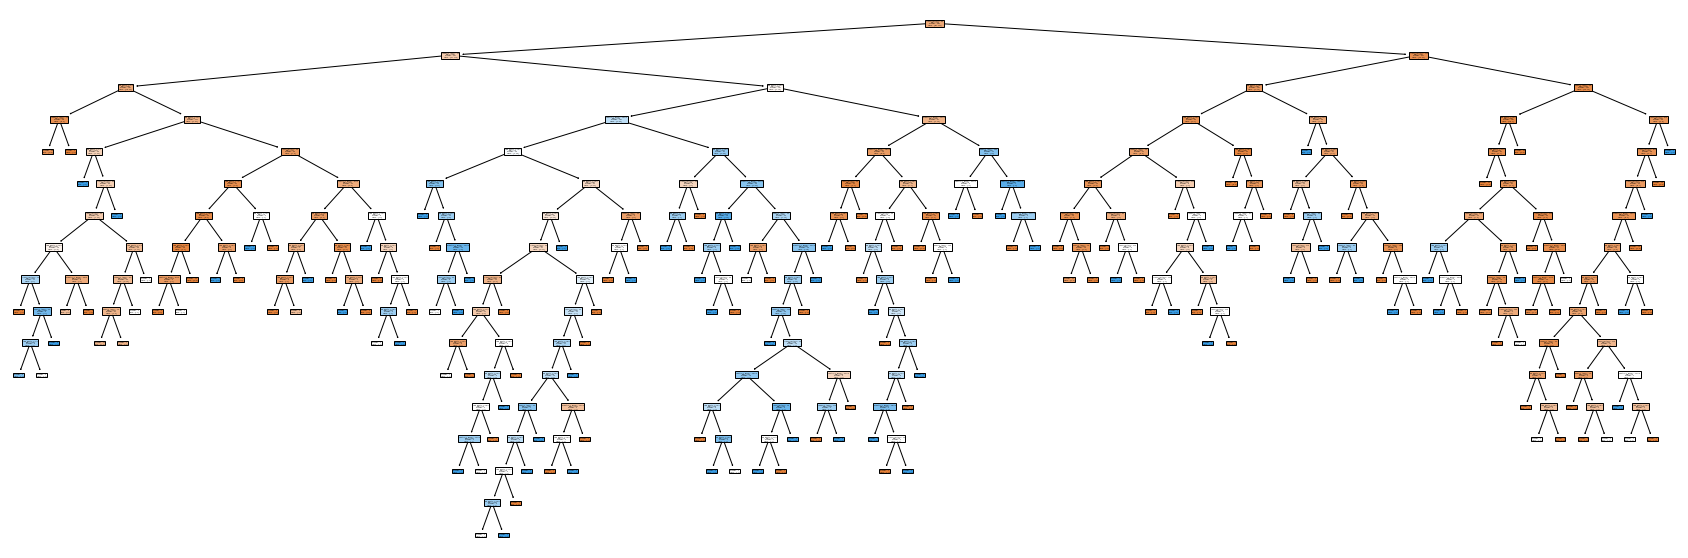

In [69]:
#from sklearn import tree
#plt.figure(figsize=(30,10))
#tree.plot_tree(dt, feature_names = X.columns, filled=True)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



